Mst Ayesha Sultana <br>
February, 05, 2025  <br>

# Exercise 1 | TKO_7092 Evaluation of Machine Learning Methods 2025

##### Prediction of the metal ion content from multi-parameter data
<b> Use K-Nearest Neighbor Regression with euclidean distance to predict total metal concentration (c_total), concentration of Cadmium (Cd) and concentration of Lead (Pb), using number of neighbors k = 1, 3, 5, 7.</b>

    - You may use Nearest Neighbor Regression from https://scikit-learn.org/stable/modules/neighbors.html   
    - Implement Leave-One-Out cross-validation and calculate the C-index for each output (c_total, Cd, Pb). 
    - Implement Leave-Replicas-Out cross-validation and calculate the C-index for each output (c_total, Cd, Pb).
    - Return your solution as a Jupyter Notebook .ipynb notebook and as a PDF-file made from it. Please, add your full name to the file name.
    - The exercise will be graded by a maximum of 2 points.
    - Submit to moodle your solution on ** Wednesday 5 of February ** at the latest.
  
<b>Please be aware that you are required to submit your individual solution.<br> 
Submissions with identical or similar code will result in a failure for the exercise.</b>

## Import libraries

In [4]:
# In this cell import all libraries you need. For example: 
import numpy as np
import pandas as pd
from scipy.stats import somersd
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GroupKFold
import matplotlib.pyplot as plt


## Read and visualize the dataset

<p> <b>Note:</b> This dataset differs slightly from the one used in the video lectures. <br>
<b>In this dataset, some mixtures have 3 replicas, while others have 4 replicas. </b> </p> 

In the following cell: 
- Read the file water_data.csv
- Print the dimesions of the dataset (i.e. number of rows and columns) and display the first 5 rows.
- Identify the inputs and the outputs columns.
- Provide the number of mixtures with 3 replicas and 4 replicas, respectively.

In [7]:
# Path of the datset
data_path = "water_data.csv"

# Read the dataset
df = pd.read_csv(data_path)

In [8]:
# Dimention of the dataset
dimen = df.shape
print("Dimention of the data:", dimen)

# Print first 5 rows from the dataset
df.head(5)

Dimention of the data: (225, 6)


,c_total,Cd,Pb,Mod1,Mod2,Mod3
0,0.0,0.0,0.0,-0.999216,-0.714208,-0.414911
1,0.0,0.0,0.0,-0.990800,-0.714373,-0.238335
2,0.0,0.0,0.0,-0.990539,-0.714125,0.020788
3,14.0,0.0,14.0,-1.001247,-0.713546,0.945465
4,14.0,0.0,14.0,-1.013727,-0.714125,0.569631


<b> Identiying the inputs and outputs </b>

There are a total of six columns. 

The first three columns include the data for our outputs(targets). which are the total concentration (c_total), the amount of Cadmium(Cd) and the amount of Lead(Pb) in a data point that we will predict from the inputs.

The following three colums Mod1, Mod2, Mod3 will be used as an inputs(features) to predict the outputs.

In [10]:
inputs_columns = ['Mod1', 'Mod2', 'Mod3']
outputs_columns = ['c_total', 'Cd', 'Pb']

print("Name of the input columns: ", inputs_columns)
print("Name of the output columns: ", outputs_columns)


Name of the input columns:  ['Mod1', 'Mod2', 'Mod3']
Name of the output columns:  ['c_total', 'Cd', 'Pb']


<b> Number of mixtures with 3 replicas and 4 replicas </b> 

To get the number of mixture replicas, group the rows of the DataFrame df by the unique combinations of the columns 'c_total', 'Cd', and 'Pb', then count the number of occurrences for each group.

In [12]:
# Grouping the rows with unique number of columns 'c_total', 'Cd', 'Pb'
total_replicas = df.groupby(['c_total', 'Cd', 'Pb']).size()

# Count the number of groups with 3 replicas and 4 replicas
three_replicas = total_replicas[total_replicas == 3].count()
four_replicas = total_replicas[total_replicas == 4].count()

print("Number of mixtures with 3 replicas:", three_replicas)
print("Number of mixtures with 4 replicas:", four_replicas)

Number of mixtures with 3 replicas: 43
Number of mixtures with 4 replicas: 24


In [13]:
# Defining a list of the values of K to be used for our model training with K-Nearest Neighbor Regression 
k_values = [1, 3, 5, 7]

## C-index code 

In [15]:
# In this cell is the fuction that computes the c-index value based on Somers'D statistic.
# Use this fuction as the evaluation metric in the Leave-One-Out (LOOCV) and Leave-Replicas-Out (LROCV) cross-validation methods.

def cindex(true, pred):
    s_d = somersd(true, y=pred, alternative='two-sided')
    c_index = (s_d.statistic + 1.0)/2.0
    return c_index

## Functions

In [17]:
def perform_loocv(X, y, model):
    """
    Perform Leave-One-Out Cross-Validation in a KNeighborRegression model.
    Returns a pair of (true, predicted) values for each test set as a result of loocv.
    """
    # y_true will have the true values from the output columns
    y_true = []

    # y_true will have the predicted values from the model
    y_pred = []

    # Initializing LeaveOneOut
    loo = LeaveOneOut()

    for train_idx, test_idx in loo.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Train the model on the splited data
        model.fit(X_train, y_train)

        # Checking the prediction with the test data
        pred = model.predict(X_test)

        # Storing the true value and predicted values
        y_true.append(y_test.values[0])
        y_pred.append(pred[0])

    return y_true, y_pred

def perform_lrocv(X, y, model, groups, df):
    """
    Perform Leave-Replicas-Out Cross-Validation for a KNeighborRegression model.
    Returns a pair of (true, predicted) values for each test set as a result of lrocv.
    """
    # y_true will have the true values from the output columns
    y_true = []

    # y_true will have the predicted values from the model
    y_pred = []

    for train_idx, test_idx in group_kfold.split(df, groups=groups):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        # Train the model on the splited data
        model.fit(X_train, y_train)

        # Checking the prediction with the test data
        pred = model.predict(X_test)

        # Storing the true value and predicted values
        y_true.extend(y_test.tolist())
        y_pred.extend(pred.tolist())

    return y_true, y_pred


def calculate_cindex_result(results):
    """
    Calculate the C-index for each k using the provided true and predicted values.
    """
    cindex_results = {}

    for k, (y_true, y_pred) in results.items():
        c = cindex(y_true, y_pred)
        cindex_results[k] = c

    return cindex_results


## Results for Leave-One-Out cross-validation

In [19]:
# Initialize the KNN regressor with k values
knn_models = {k: KNeighborsRegressor(n_neighbors=k, metric='euclidean') for k in k_values}

# Storing the feature/input columns in X
X = df[inputs_columns]
loocv_results = {}

# Initialize loocv_cindex_results with empty dictionaries for each output column
loocv_cindex_results = {target: {} for target in outputs_columns}

# Perform LOO CV and calculate C-index
for output_col in outputs_columns:
    y = df[output_col]  # y will store the data of specific output columns (c_total, Cd, Pb)

    # Perform LOO CV for the k values one by one
    for k in k_values:
        # Perform LOO CV, returning true and predicted values
        y_true, y_pred = perform_loocv(X, y, knn_models[k])
        
        # Store the results for the current k
        loocv_results[k] = (y_true, y_pred)
    
    # Now calculate the C-index for the current output column
    loocv_cindex_results[output_col] = calculate_cindex_result(loocv_results)


In [20]:

# Print the C-index results with k values and output columns
for output_col in outputs_columns:
    print(f"\nC-index Results for {output_col}:")
    for k in k_values:
        if k in loocv_cindex_results[output_col]:
            cindex_value = loocv_cindex_results[output_col][k]
            print(f"k={k}: C-index={cindex_value:.4f}")
          


C-index Results for c_total:
k=1: C-index=0.9083
k=3: C-index=0.9142
k=5: C-index=0.8941
k=7: C-index=0.8737

C-index Results for Cd:
k=1: C-index=0.9219
k=3: C-index=0.8996
k=5: C-index=0.8620
k=7: C-index=0.8142

C-index Results for Pb:
k=1: C-index=0.8805
k=3: C-index=0.8745
k=5: C-index=0.8543
k=7: C-index=0.8355


## Results for Leave-Replicas-Out cross-validation

In [22]:
# Initialize the KNN regressor with k values
knn_models = {k: KNeighborsRegressor(n_neighbors=k, metric='euclidean') for k in k_values}

X = df[inputs_columns]
lrocv_results = {}

# Initialize the cindex_lrocv_results dictionary for storing results of C-index
cindex_lrocv_results = {target: {} for target in outputs_columns}

# Split the dataset into 67 groups (since we have 43 total of 3 replicas and 24 total of 4 replicas)
group_kfold = GroupKFold(n_splits=67)  
groups = df.groupby(outputs_columns).ngroup()

# Perform LRO CV and calculate C-index for each output column
for output_col in outputs_columns:
    y = df[output_col]
    
    # Perform LRO CV for the k values one by one
    for k in k_values:
        knr = knn_models[k]  # Get the model for the current k value
        
        # Perform LRO-CV, returning true and predicted values
        y_true, y_pred = perform_lrocv(X, y, knr, groups, df)
        
        # Store the results for the current k
        lrocv_results[k] = (y_true, y_pred)

    # Now calculate the C-index for the current output column using the LRO CV results
    cindex_lrocv_results[output_col] = calculate_cindex_result(lrocv_results)

# Print the C-index results with k values and output columns
for output_col in outputs_columns:
    print(f"\nC-index Results for {output_col}:")
    for k in k_values:
        if k in cindex_lrocv_results[output_col]:
            cindex_value = cindex_lrocv_results[output_col][k]
            print(f"k={k}: C-index={cindex_value:.4f}")



C-index Results for c_total:
k=1: C-index=0.8184
k=3: C-index=0.8187
k=5: C-index=0.8117
k=7: C-index=0.8164

C-index Results for Cd:
k=1: C-index=0.7784
k=3: C-index=0.7615
k=5: C-index=0.7397
k=7: C-index=0.7153

C-index Results for Pb:
k=1: C-index=0.7378
k=3: C-index=0.7689
k=5: C-index=0.7478
k=7: C-index=0.7618


## Plot Leave-One-Out and Leave-Replicas-Out Results

Note: You may plot the results as they were presented in the video lecture (refer to MOOC2-Module 2 .pptx slides).

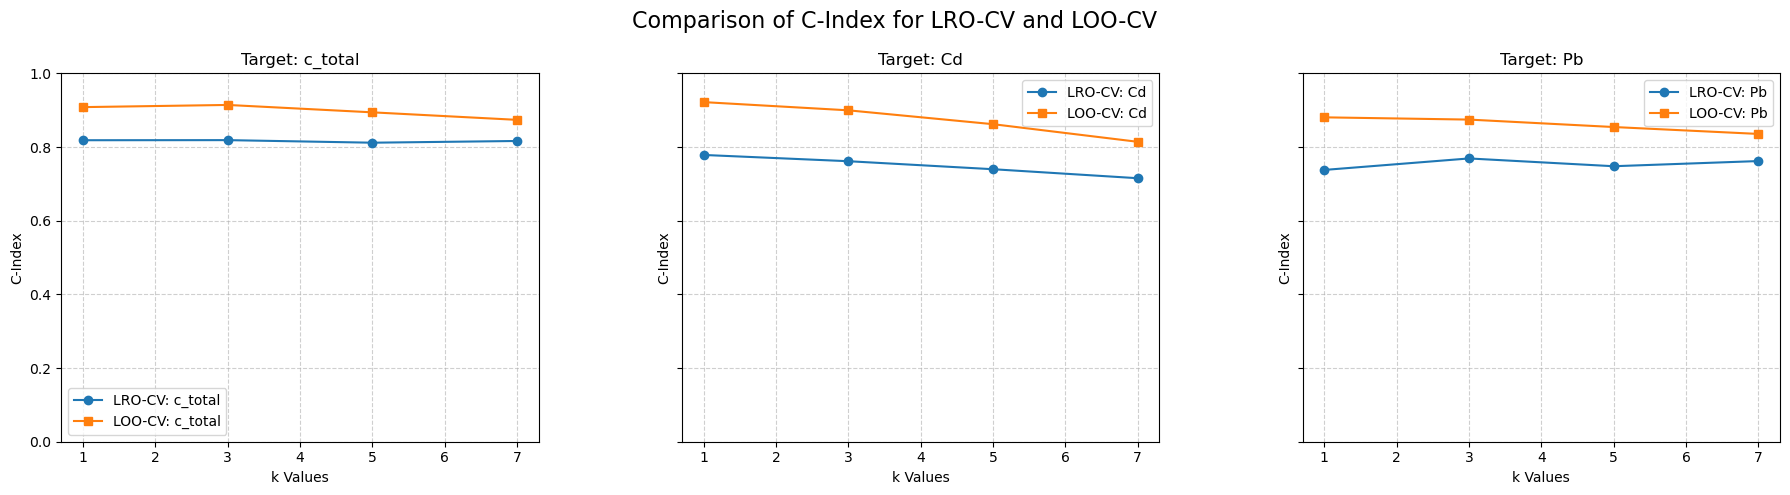

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
fig.suptitle('Comparison of C-Index for LRO-CV and LOO-CV', fontsize=16)

for i, output_col in enumerate(outputs_columns):
    ax = axes[i]
    lrocv_cindex_vals = [cindex_lrocv_results[output_col].get(k, 0) for k in k_values]
    loocv_cindex_vals = [loocv_cindex_results[output_col].get(k, 0) for k in k_values]
    
    ax.plot(k_values, lrocv_cindex_vals, marker='o', label=f'LRO-CV: {output_col}', color='tab:blue')
    ax.plot(k_values, loocv_cindex_vals, marker='s', label=f'LOO-CV: {output_col}', color='tab:orange')
    
    ax.set_title(f'Target: {output_col}')
    ax.set_xlabel('k Values')
    ax.set_ylabel('C-Index')
    ax.set_ylim(0, 1)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend()

plt.tight_layout()
plt.subplots_adjust(wspace=0.3)
plt.show()


## Interpretation of results
#### Answer the following questions based on the results obtained
1. Which cross-validation approach produced more optimistic results, and why?
2. Which cross-validation method provides a better estimate of the model's performance on unseen mixtures? Explain your answer.

#### Answers:

<b>1. Which cross-validation approach produced more optimistic results, and why?</b>

To figure out which cross-validation method produced more optimistic results, we can look at the C-index values from Leave-One-Out (LOO) and Leave-Replicas-Out (LRO) cross-validation. From the results, we see that LOO gave higher C-index values for all three targets (Total concentration, Cadmium, and Lead), and the number of neighbors used didn't make much difference.

LOO produced more optimistic results because it didn't fully consider that the test and training sets might share similar data points, especially when replicates of the same mixture are involved. Since LOO holds out only a single data point at a time for testing, the model is trained on data that might still include replicates of the same mixture, violating the independence assumption between the test and training sets. This leads to an overestimation of the model's performance, making it seem better than it would be in a real-world scenario.

<b>Which cross-validation method provides a better estimate of the model's performance on unseen mixtures? Explain your answer.</b>

Leave-Replicas-Out cross-validation provides a better estimate of the model's performance on unseen mixtures. This is because LRO respects the independence assumption by ensuring that the test and training sets do not share replicates of the same mixture. By avoiding this overlap, LRO provides a more realistic evaluation of the model's ability to generalize to new, unseen data.

Looking at the results, we can see that the C-index values for LRO are generally lower compared to Leave-One-Out (LOO), which suggests that LRO provides a more accurate estimate of the model's true performance. While LOO shows higher C-index values (closer to 1), this can be misleading because LOO overestimates the model's performance due to the test and training sets having replicates of the same mixture, leading to artificially higher C-index values.

Therefore, LRO's lower but more stable C-index values indicate it is providing a better reflection of the model's real-world performance on new mixtures.